In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "TSLA"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: TSLA

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,TSLA
Date,,,
2014-03-27,15.25,558.46,207.320
2014-03-28,15.45,559.99,212.370
2014-03-31,15.60,556.97,208.450
2014-04-01,16.32,567.16,216.970
2014-04-02,16.46,567.00,230.290
2014-04-03,16.39,569.74,225.400
2014-04-04,16.13,543.14,212.225
2014-04-07,15.94,538.15,207.520
2014-04-08,16.10,554.90,215.460


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1007
GOOG    1007
TSLA    1007
dtype: int64

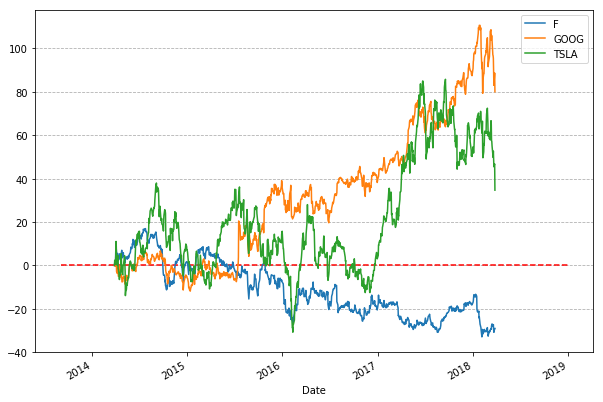

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,TSLA
Date,,,
2014-03-28,0.013030,0.002736,0.024067
2014-03-31,0.009662,-0.005408,-0.018631
2014-04-01,0.045120,0.018130,0.040060
2014-04-02,0.008542,-0.000282,0.059580
2014-04-03,-0.004262,0.004821,-0.021463
2014-04-04,-0.015991,-0.047813,-0.060230
2014-04-07,-0.011849,-0.009230,-0.022419
2014-04-08,0.009988,0.030651,0.037548
2014-04-09,-0.016281,0.016515,0.006799


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085055
GOOG    0.146039
TSLA    0.073955
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,TSLA
F,0.052101,0.016789,0.023396
GOOG,0.016789,0.050494,0.029402
TSLA,0.023396,0.029402,0.152522


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,TSLA
F,1.000000,0.327321,0.262458
GOOG,0.327321,1.000000,0.335037
TSLA,0.262458,0.335037,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.4226, 'GOOG': 0.1959, 'TSLA': 0.3816, 'RTN': 0.0209, 'VOL': 0.2195, 'Sharpe': -0.3514} 


 {'F': 0.3536, 'GOOG': 0.4259, 'TSLA': 0.2205, 'RTN': 0.0484, 'VOL': 0.1932, 'Sharpe': -0.2566} 


 {'F': 0.1038, 'GOOG': 0.3352, 'TSLA': 0.561, 'RTN': 0.0816, 'VOL': 0.263, 'Sharpe': -0.0623} 


 {'F': 0.4628, 'GOOG': 0.5093, 'TSLA': 0.0279, 'RTN': 0.0371, 'VOL': 0.1837, 'Sharpe': -0.3317} 


 {'F': 0.3799, 'GOOG': 0.2421, 'TSLA': 0.378, 'RTN': 0.031, 'VOL': 0.2179, 'Sharpe': -0.3076} 


 {'F': 0.1706, 'GOOG': 0.6779, 'TSLA': 0.1515, 'RTN': 0.0957, 'VOL': 0.1984, 'Sharpe': -0.0116} 


 {'F': 0.4173, 'GOOG': 0.0056, 'TSLA': 0.5771, 'RTN': 0.008, 'VOL': 0.2672, 'Sharpe': -0.3368} 


 {'F': 0.1635, 'GOOG': 0.4007, 'TSLA': 0.4359, 'RTN': 0.0768, 'VOL': 0.233, 'Sharpe': -0.0908} 


 {'F': 0.5044, 'GOOG': 0.4444, 'TSLA': 0.0512, 'RTN': 0.0258, 'VOL': 0.1836, 'Sharpe': -0.3933} 


 {'F': 0.3411, 'GOOG': 0.0109, 'TSLA': 0.648, 'RTN': 0.0205, 'VOL': 0.2846, 'Sharpe': -0.2723} 


 {'F': 0.2509, '


 {'F': 0.3312, 'GOOG': 0.375, 'TSLA': 0.2938, 'RTN': 0.0483, 'VOL': 0.2029, 'Sharpe': -0.2448} 


 {'F': 0.5415, 'GOOG': 0.2055, 'TSLA': 0.253, 'RTN': 0.0027, 'VOL': 0.2009, 'Sharpe': -0.4745} 


 {'F': 0.4201, 'GOOG': 0.4529, 'TSLA': 0.127, 'RTN': 0.0398, 'VOL': 0.1851, 'Sharpe': -0.3143} 


 {'F': 0.3234, 'GOOG': 0.5097, 'TSLA': 0.1669, 'RTN': 0.0593, 'VOL': 0.1894, 'Sharpe': -0.2044} 


 {'F': 0.356, 'GOOG': 0.5062, 'TSLA': 0.1379, 'RTN': 0.0538, 'VOL': 0.1868, 'Sharpe': -0.2364} 


 {'F': 0.3229, 'GOOG': 0.2825, 'TSLA': 0.3945, 'RTN': 0.043, 'VOL': 0.2209, 'Sharpe': -0.2491} 


 {'F': 0.3007, 'GOOG': 0.1057, 'TSLA': 0.5936, 'RTN': 0.0338, 'VOL': 0.2686, 'Sharpe': -0.2392} 


 {'F': 0.257, 'GOOG': 0.2353, 'TSLA': 0.5077, 'RTN': 0.0501, 'VOL': 0.2464, 'Sharpe': -0.1946} 


 {'F': 0.2379, 'GOOG': 0.3545, 'TSLA': 0.4077, 'RTN': 0.0617, 'VOL': 0.2247, 'Sharpe': -0.1616} 


 {'F': 0.5324, 'GOOG': 0.1843, 'TSLA': 0.2833, 'RTN': 0.0026, 'VOL': 0.2053, 'Sharpe': -0.4648} 


 {'F': 0.5424, 

 {'F': 0.169, 'GOOG': 0.1341, 'TSLA': 0.6969, 'RTN': 0.0568, 'VOL': 0.2971, 'Sharpe': -0.1388} 


 {'F': 0.4093, 'GOOG': 0.2176, 'TSLA': 0.3731, 'RTN': 0.0246, 'VOL': 0.2174, 'Sharpe': -0.3378} 


 {'F': 0.1161, 'GOOG': 0.1809, 'TSLA': 0.703, 'RTN': 0.0685, 'VOL': 0.2996, 'Sharpe': -0.0984} 


 {'F': 0.2839, 'GOOG': 0.6731, 'TSLA': 0.043, 'RTN': 0.0773, 'VOL': 0.1899, 'Sharpe': -0.1089} 


 {'F': 0.2376, 'GOOG': 0.4463, 'TSLA': 0.3161, 'RTN': 0.0684, 'VOL': 0.2088, 'Sharpe': -0.142} 


 {'F': 0.1704, 'GOOG': 0.1859, 'TSLA': 0.6436, 'RTN': 0.0603, 'VOL': 0.2823, 'Sharpe': -0.1337} 


 {'F': 0.4062, 'GOOG': 0.2335, 'TSLA': 0.3603, 'RTN': 0.0262, 'VOL': 0.2148, 'Sharpe': -0.3343} 


 {'F': 0.2865, 'GOOG': 0.4164, 'TSLA': 0.2971, 'RTN': 0.0584, 'VOL': 0.2044, 'Sharpe': -0.1937} 


 {'F': 0.4003, 'GOOG': 0.3883, 'TSLA': 0.2114, 'RTN': 0.0383, 'VOL': 0.1918, 'Sharpe': -0.3113} 


 {'F': 0.3143, 'GOOG': 0.3924, 'TSLA': 0.2933, 'RTN': 0.0523, 'VOL': 0.2031, 'Sharpe': -0.2251} 


 {'F': 0.0146,


 {'F': 0.1641, 'GOOG': 0.4273, 'TSLA': 0.4086, 'RTN': 0.0787, 'VOL': 0.2277, 'Sharpe': -0.0849} 


 {'F': 0.5535, 'GOOG': 0.3872, 'TSLA': 0.0594, 'RTN': 0.0139, 'VOL': 0.1848, 'Sharpe': -0.4553} 


 {'F': 0.3009, 'GOOG': 0.2751, 'TSLA': 0.4241, 'RTN': 0.0459, 'VOL': 0.2271, 'Sharpe': -0.2292} 


 {'F': 0.3492, 'GOOG': 0.5116, 'TSLA': 0.1392, 'RTN': 0.0553, 'VOL': 0.187, 'Sharpe': -0.2282} 


 {'F': 0.3821, 'GOOG': 0.0497, 'TSLA': 0.5682, 'RTN': 0.0168, 'VOL': 0.2635, 'Sharpe': -0.3083} 


 {'F': 0.1879, 'GOOG': 0.3575, 'TSLA': 0.4547, 'RTN': 0.0699, 'VOL': 0.2359, 'Sharpe': -0.1193} 


 {'F': 0.4954, 'GOOG': 0.0049, 'TSLA': 0.4997, 'RTN': -0.0045, 'VOL': 0.2504, 'Sharpe': -0.4093} 


 {'F': 0.0831, 'GOOG': 0.2043, 'TSLA': 0.7126, 'RTN': 0.0755, 'VOL': 0.303, 'Sharpe': -0.0744} 


 {'F': 0.3584, 'GOOG': 0.5782, 'TSLA': 0.0633, 'RTN': 0.0586, 'VOL': 0.1854, 'Sharpe': -0.2123} 


 {'F': 0.2109, 'GOOG': 0.5977, 'TSLA': 0.1914, 'RTN': 0.0835, 'VOL': 0.197, 'Sharpe': -0.0736} 


 {'F': 0.48

 {'F': 0.1126, 'GOOG': 0.432, 'TSLA': 0.4554, 'RTN': 0.0872, 'VOL': 0.2394, 'Sharpe': -0.0451} 


 {'F': 0.1473, 'GOOG': 0.3012, 'TSLA': 0.5514, 'RTN': 0.0722, 'VOL': 0.2591, 'Sharpe': -0.0994} 


 {'F': 0.3971, 'GOOG': 0.5169, 'TSLA': 0.0859, 'RTN': 0.0481, 'VOL': 0.1842, 'Sharpe': -0.271} 


 {'F': 0.3456, 'GOOG': 0.4277, 'TSLA': 0.2266, 'RTN': 0.0498, 'VOL': 0.194, 'Sharpe': -0.2483} 


 {'F': 0.4518, 'GOOG': 0.4481, 'TSLA': 0.1001, 'RTN': 0.0344, 'VOL': 0.184, 'Sharpe': -0.3456} 


 {'F': 0.384, 'GOOG': 0.2242, 'TSLA': 0.3918, 'RTN': 0.0291, 'VOL': 0.2208, 'Sharpe': -0.3123} 


 {'F': 0.3468, 'GOOG': 0.3488, 'TSLA': 0.3044, 'RTN': 0.0439, 'VOL': 0.2044, 'Sharpe': -0.2644} 


 {'F': 0.5352, 'GOOG': 0.2198, 'TSLA': 0.245, 'RTN': 0.0047, 'VOL': 0.1994, 'Sharpe': -0.4678} 


 {'F': 0.4497, 'GOOG': 0.4662, 'TSLA': 0.0841, 'RTN': 0.0361, 'VOL': 0.1836, 'Sharpe': -0.3374} 


 {'F': 0.3844, 'GOOG': 0.2241, 'TSLA': 0.3915, 'RTN': 0.029, 'VOL': 0.2207, 'Sharpe': -0.3127} 


 {'F': 0.1505, 'G


 {'F': 0.0567, 'GOOG': 0.2224, 'TSLA': 0.7209, 'RTN': 0.081, 'VOL': 0.3061, 'Sharpe': -0.0557} 


 {'F': 0.445, 'GOOG': 0.4873, 'TSLA': 0.0677, 'RTN': 0.0383, 'VOL': 0.1834, 'Sharpe': -0.3254} 


 {'F': 0.499, 'GOOG': 0.4384, 'TSLA': 0.0626, 'RTN': 0.0262, 'VOL': 0.1836, 'Sharpe': -0.3911} 


 {'F': 0.4708, 'GOOG': 0.476, 'TSLA': 0.0532, 'RTN': 0.0334, 'VOL': 0.1833, 'Sharpe': -0.3524} 


 {'F': 0.0321, 'GOOG': 0.6061, 'TSLA': 0.3618, 'RTN': 0.1125, 'VOL': 0.2295, 'Sharpe': 0.0634} 


 {'F': 0.4654, 'GOOG': 0.0571, 'TSLA': 0.4775, 'RTN': 0.0041, 'VOL': 0.2431, 'Sharpe': -0.3864} 


 {'F': 0.5662, 'GOOG': 0.412, 'TSLA': 0.0218, 'RTN': 0.0136, 'VOL': 0.1852, 'Sharpe': -0.4557} 


 {'F': 0.3527, 'GOOG': 0.468, 'TSLA': 0.1792, 'RTN': 0.0516, 'VOL': 0.1894, 'Sharpe': -0.2449} 


 {'F': 0.3247, 'GOOG': 0.6135, 'TSLA': 0.0619, 'RTN': 0.0666, 'VOL': 0.1869, 'Sharpe': -0.1682} 


 {'F': 0.0065, 'GOOG': 0.5583, 'TSLA': 0.4352, 'RTN': 0.1132, 'VOL': 0.2433, 'Sharpe': 0.0623} 


 {'F': 0.5141, 'G

 {'F': 0.4223, 'GOOG': 0.021, 'TSLA': 0.5567, 'RTN': 0.0083, 'VOL': 0.2619, 'Sharpe': -0.3425} 


 {'F': 0.2869, 'GOOG': 0.2509, 'TSLA': 0.4622, 'RTN': 0.0464, 'VOL': 0.2356, 'Sharpe': -0.2189} 


 {'F': 0.6036, 'GOOG': 0.0927, 'TSLA': 0.3038, 'RTN': -0.0153, 'VOL': 0.2135, 'Sharpe': -0.5307} 


 {'F': 0.453, 'GOOG': 0.1584, 'TSLA': 0.3886, 'RTN': 0.0133, 'VOL': 0.2219, 'Sharpe': -0.3815} 


 {'F': 0.5219, 'GOOG': 0.3357, 'TSLA': 0.1424, 'RTN': 0.0152, 'VOL': 0.1875, 'Sharpe': -0.4418} 


 {'F': 0.6796, 'GOOG': 0.2108, 'TSLA': 0.1096, 'RTN': -0.0189, 'VOL': 0.1944, 'Sharpe': -0.6014} 


 {'F': 0.2265, 'GOOG': 0.1719, 'TSLA': 0.6016, 'RTN': 0.0503, 'VOL': 0.2704, 'Sharpe': -0.1763} 


 {'F': 0.5048, 'GOOG': 0.1262, 'TSLA': 0.369, 'RTN': 0.0028, 'VOL': 0.2201, 'Sharpe': -0.4326} 


 {'F': 0.2915, 'GOOG': 0.2367, 'TSLA': 0.4718, 'RTN': 0.0447, 'VOL': 0.2377, 'Sharpe': -0.2244} 


 {'F': 0.4052, 'GOOG': 0.3043, 'TSLA': 0.2905, 'RTN': 0.0315, 'VOL': 0.2024, 'Sharpe': -0.3288} 


 {'F': 0.43


 {'F': 0.5294, 'GOOG': 0.1521, 'TSLA': 0.3184, 'RTN': 0.0007, 'VOL': 0.2114, 'Sharpe': -0.4601} 


 {'F': 0.7926, 'GOOG': 0.1396, 'TSLA': 0.0678, 'RTN': -0.042, 'VOL': 0.203, 'Sharpe': -0.6898} 


 {'F': 0.2716, 'GOOG': 0.427, 'TSLA': 0.3014, 'RTN': 0.0616, 'VOL': 0.2054, 'Sharpe': -0.1774} 


 {'F': 0.3967, 'GOOG': 0.3932, 'TSLA': 0.2101, 'RTN': 0.0392, 'VOL': 0.1917, 'Sharpe': -0.3067} 


 {'F': 0.3593, 'GOOG': 0.3239, 'TSLA': 0.3167, 'RTN': 0.0402, 'VOL': 0.2064, 'Sharpe': -0.2802} 


 {'F': 0.6052, 'GOOG': 0.231, 'TSLA': 0.1638, 'RTN': -0.0056, 'VOL': 0.1935, 'Sharpe': -0.5357} 


 {'F': 0.1464, 'GOOG': 0.3979, 'TSLA': 0.4556, 'RTN': 0.0794, 'VOL': 0.2377, 'Sharpe': -0.0784} 


 {'F': 0.3284, 'GOOG': 0.3525, 'TSLA': 0.319, 'RTN': 0.0471, 'VOL': 0.2069, 'Sharpe': -0.2457} 


 {'F': 0.037, 'GOOG': 0.5788, 'TSLA': 0.3842, 'RTN': 0.1098, 'VOL': 0.2323, 'Sharpe': 0.0507} 


 {'F': 0.7943, 'GOOG': 0.1804, 'TSLA': 0.0253, 'RTN': -0.0393, 'VOL': 0.2016, 'Sharpe': -0.6813} 


 {'F': 0.5201


 {'F': 0.3348, 'GOOG': 0.1051, 'TSLA': 0.5601, 'RTN': 0.0283, 'VOL': 0.2601, 'Sharpe': -0.268} 


 {'F': 0.0045, 'GOOG': 0.106, 'TSLA': 0.8895, 'RTN': 0.0809, 'VOL': 0.3564, 'Sharpe': -0.0481} 


 {'F': 0.2625, 'GOOG': 0.0421, 'TSLA': 0.6953, 'RTN': 0.0352, 'VOL': 0.2967, 'Sharpe': -0.2115} 


 {'F': 0.4289, 'GOOG': 0.1059, 'TSLA': 0.4652, 'RTN': 0.0134, 'VOL': 0.2386, 'Sharpe': -0.3546} 


 {'F': 0.3037, 'GOOG': 0.1662, 'TSLA': 0.5302, 'RTN': 0.0376, 'VOL': 0.2519, 'Sharpe': -0.2395} 


 {'F': 0.1765, 'GOOG': 0.4368, 'TSLA': 0.3867, 'RTN': 0.0774, 'VOL': 0.2231, 'Sharpe': -0.0924} 


 {'F': 0.6145, 'GOOG': 0.0946, 'TSLA': 0.2909, 'RTN': -0.0169, 'VOL': 0.2121, 'Sharpe': -0.542} 


 {'F': 0.633, 'GOOG': 0.279, 'TSLA': 0.0879, 'RTN': -0.0066, 'VOL': 0.1897, 'Sharpe': -0.5515} 


 {'F': 0.463, 'GOOG': 0.2786, 'TSLA': 0.2584, 'RTN': 0.0204, 'VOL': 0.1986, 'Sharpe': -0.3907} 


 {'F': 0.4466, 'GOOG': 0.4096, 'TSLA': 0.1438, 'RTN': 0.0325, 'VOL': 0.1861, 'Sharpe': -0.3522} 


 {'F': 0.5948


 {'F': 0.51, 'GOOG': 0.174, 'TSLA': 0.316, 'RTN': 0.0054, 'VOL': 0.2099, 'Sharpe': -0.4411} 


 {'F': 0.1684, 'GOOG': 0.3454, 'TSLA': 0.4862, 'RTN': 0.0721, 'VOL': 0.2433, 'Sharpe': -0.1065} 


 {'F': 0.0296, 'GOOG': 0.5047, 'TSLA': 0.4657, 'RTN': 0.1056, 'VOL': 0.2469, 'Sharpe': 0.0309} 


 {'F': 0.5235, 'GOOG': 0.3085, 'TSLA': 0.1681, 'RTN': 0.013, 'VOL': 0.1897, 'Sharpe': -0.4484} 


 {'F': 0.563, 'GOOG': 0.3906, 'TSLA': 0.0464, 'RTN': 0.0126, 'VOL': 0.185, 'Sharpe': -0.4618} 


 {'F': 0.3881, 'GOOG': 0.2354, 'TSLA': 0.3764, 'RTN': 0.0292, 'VOL': 0.2177, 'Sharpe': -0.3161} 


 {'F': 0.2878, 'GOOG': 0.6796, 'TSLA': 0.0326, 'RTN': 0.0772, 'VOL': 0.19, 'Sharpe': -0.1096} 


 {'F': 0.4242, 'GOOG': 0.1808, 'TSLA': 0.395, 'RTN': 0.0195, 'VOL': 0.2223, 'Sharpe': -0.3529} 


 {'F': 0.307, 'GOOG': 0.0341, 'TSLA': 0.659, 'RTN': 0.0276, 'VOL': 0.2869, 'Sharpe': -0.2453} 


 {'F': 0.3474, 'GOOG': 0.5874, 'TSLA': 0.0652, 'RTN': 0.0611, 'VOL': 0.1858, 'Sharpe': -0.1988} 


 {'F': 0.2771, 'GOOG':

 {'F': 0.2182, 'GOOG': 0.347, 'TSLA': 0.4347, 'RTN': 0.0643, 'VOL': 0.2307, 'Sharpe': -0.1462} 


 {'F': 0.0509, 'GOOG': 0.5433, 'TSLA': 0.4058, 'RTN': 0.105, 'VOL': 0.2345, 'Sharpe': 0.0299} 


 {'F': 0.2478, 'GOOG': 0.3147, 'TSLA': 0.4375, 'RTN': 0.0572, 'VOL': 0.2306, 'Sharpe': -0.1768} 


 {'F': 0.2991, 'GOOG': 0.3258, 'TSLA': 0.3751, 'RTN': 0.0499, 'VOL': 0.2172, 'Sharpe': -0.2215} 


 {'F': 0.2204, 'GOOG': 0.3734, 'TSLA': 0.4062, 'RTN': 0.0658, 'VOL': 0.225, 'Sharpe': -0.143} 


 {'F': 0.5197, 'GOOG': 0.0915, 'TSLA': 0.3888, 'RTN': -0.0021, 'VOL': 0.2252, 'Sharpe': -0.4445} 


 {'F': 0.1137, 'GOOG': 0.5885, 'TSLA': 0.2978, 'RTN': 0.0983, 'VOL': 0.2141, 'Sharpe': 0.0014} 


 {'F': 0.8161, 'GOOG': 0.0719, 'TSLA': 0.112, 'RTN': -0.0506, 'VOL': 0.2088, 'Sharpe': -0.7118} 


 {'F': 0.489, 'GOOG': 0.3882, 'TSLA': 0.1229, 'RTN': 0.0242, 'VOL': 0.1854, 'Sharpe': -0.3982} 


 {'F': 0.4217, 'GOOG': 0.2841, 'TSLA': 0.2942, 'RTN': 0.0274, 'VOL': 0.2032, 'Sharpe': -0.3475} 


 {'F': 0.3505, '


 {'F': 0.7081, 'GOOG': 0.1382, 'TSLA': 0.1537, 'RTN': -0.0287, 'VOL': 0.2008, 'Sharpe': -0.6309} 


 {'F': 0.2876, 'GOOG': 0.4867, 'TSLA': 0.2257, 'RTN': 0.0633, 'VOL': 0.1955, 'Sharpe': -0.1774} 


 {'F': 0.2038, 'GOOG': 0.2372, 'TSLA': 0.559, 'RTN': 0.0586, 'VOL': 0.2597, 'Sharpe': -0.1516} 


 {'F': 0.4571, 'GOOG': 0.1418, 'TSLA': 0.4011, 'RTN': 0.0115, 'VOL': 0.2248, 'Sharpe': -0.3848} 


 {'F': 0.5013, 'GOOG': 0.4401, 'TSLA': 0.0586, 'RTN': 0.026, 'VOL': 0.1836, 'Sharpe': -0.3924} 


 {'F': 0.006, 'GOOG': 0.697, 'TSLA': 0.297, 'RTN': 0.1233, 'VOL': 0.2245, 'Sharpe': 0.1125} 


 {'F': 0.175, 'GOOG': 0.3746, 'TSLA': 0.4504, 'RTN': 0.0731, 'VOL': 0.2354, 'Sharpe': -0.1056} 


 {'F': 0.0625, 'GOOG': 0.7844, 'TSLA': 0.1531, 'RTN': 0.1206, 'VOL': 0.2098, 'Sharpe': 0.1076} 


 {'F': 0.4543, 'GOOG': 0.5214, 'TSLA': 0.0243, 'RTN': 0.0393, 'VOL': 0.1838, 'Sharpe': -0.3194} 


 {'F': 0.3949, 'GOOG': 0.1283, 'TSLA': 0.4768, 'RTN': 0.0204, 'VOL': 0.2403, 'Sharpe': -0.3229} 


 {'F': 0.1609, '


 {'F': 0.7802, 'GOOG': 0.0087, 'TSLA': 0.2112, 'RTN': -0.0495, 'VOL': 0.2158, 'Sharpe': -0.6835} 


 {'F': 0.1909, 'GOOG': 0.3456, 'TSLA': 0.4635, 'RTN': 0.0685, 'VOL': 0.2376, 'Sharpe': -0.1241} 


 {'F': 0.1533, 'GOOG': 0.5043, 'TSLA': 0.3424, 'RTN': 0.0859, 'VOL': 0.2172, 'Sharpe': -0.0556} 


 {'F': 0.2244, 'GOOG': 0.3616, 'TSLA': 0.4139, 'RTN': 0.0643, 'VOL': 0.2264, 'Sharpe': -0.1487} 


 {'F': 0.7195, 'GOOG': 0.0321, 'TSLA': 0.2484, 'RTN': -0.0381, 'VOL': 0.2146, 'Sharpe': -0.6345} 


 {'F': 0.1265, 'GOOG': 0.1365, 'TSLA': 0.737, 'RTN': 0.0637, 'VOL': 0.309, 'Sharpe': -0.1111} 


 {'F': 0.4707, 'GOOG': 0.4115, 'TSLA': 0.1177, 'RTN': 0.0288, 'VOL': 0.1848, 'Sharpe': -0.3746} 


 {'F': 0.4012, 'GOOG': 0.456, 'TSLA': 0.1428, 'RTN': 0.043, 'VOL': 0.1861, 'Sharpe': -0.2953} 


 {'F': 0.2747, 'GOOG': 0.6756, 'TSLA': 0.0497, 'RTN': 0.079, 'VOL': 0.1903, 'Sharpe': -0.1} 


 {'F': 0.1891, 'GOOG': 0.4849, 'TSLA': 0.326, 'RTN': 0.0788, 'VOL': 0.2126, 'Sharpe': -0.0902} 


 {'F': 0.6587, '


 {'F': 0.1798, 'GOOG': 0.0995, 'TSLA': 0.7208, 'RTN': 0.0525, 'VOL': 0.3038, 'Sharpe': -0.1496} 


 {'F': 0.1038, 'GOOG': 0.4981, 'TSLA': 0.3981, 'RTN': 0.0934, 'VOL': 0.2293, 'Sharpe': -0.0203} 


 {'F': 0.3139, 'GOOG': 0.5046, 'TSLA': 0.1815, 'RTN': 0.0604, 'VOL': 0.1907, 'Sharpe': -0.197} 


 {'F': 0.3917, 'GOOG': 0.251, 'TSLA': 0.3573, 'RTN': 0.0298, 'VOL': 0.2139, 'Sharpe': -0.319} 


 {'F': 0.6241, 'GOOG': 0.0495, 'TSLA': 0.3265, 'RTN': -0.0217, 'VOL': 0.2195, 'Sharpe': -0.5453} 


 {'F': 0.3463, 'GOOG': 0.4259, 'TSLA': 0.2279, 'RTN': 0.0496, 'VOL': 0.1941, 'Sharpe': -0.2494} 


 {'F': 0.0932, 'GOOG': 0.0561, 'TSLA': 0.8507, 'RTN': 0.0632, 'VOL': 0.3431, 'Sharpe': -0.1015} 


 {'F': 0.2534, 'GOOG': 0.3702, 'TSLA': 0.3765, 'RTN': 0.0604, 'VOL': 0.2184, 'Sharpe': -0.1724} 


 {'F': 0.3716, 'GOOG': 0.2658, 'TSLA': 0.3626, 'RTN': 0.034, 'VOL': 0.2147, 'Sharpe': -0.2979} 


 {'F': 0.0723, 'GOOG': 0.3633, 'TSLA': 0.5644, 'RTN': 0.0886, 'VOL': 0.2653, 'Sharpe': -0.0353} 


 {'F': 0.374

 {'F': 0.4971, 'GOOG': 0.0221, 'TSLA': 0.4808, 'RTN': -0.0035, 'VOL': 0.2456, 'Sharpe': -0.4132} 


 {'F': 0.503, 'GOOG': 0.207, 'TSLA': 0.29, 'RTN': 0.0089, 'VOL': 0.205, 'Sharpe': -0.4347} 


 {'F': 0.0214, 'GOOG': 0.5459, 'TSLA': 0.4327, 'RTN': 0.1099, 'VOL': 0.2415, 'Sharpe': 0.0493} 


 {'F': 0.2577, 'GOOG': 0.3048, 'TSLA': 0.4375, 'RTN': 0.0549, 'VOL': 0.2304, 'Sharpe': -0.1868} 


 {'F': 0.1035, 'GOOG': 0.4125, 'TSLA': 0.4839, 'RTN': 0.0872, 'VOL': 0.2457, 'Sharpe': -0.0438} 


 {'F': 0.4142, 'GOOG': 0.2562, 'TSLA': 0.3296, 'RTN': 0.0266, 'VOL': 0.2091, 'Sharpe': -0.3416} 


 {'F': 0.4031, 'GOOG': 0.2613, 'TSLA': 0.3356, 'RTN': 0.0287, 'VOL': 0.21, 'Sharpe': -0.33} 


 {'F': 0.3902, 'GOOG': 0.4739, 'TSLA': 0.1359, 'RTN': 0.0461, 'VOL': 0.1859, 'Sharpe': -0.2793} 


 {'F': 0.5445, 'GOOG': 0.319, 'TSLA': 0.1365, 'RTN': 0.0104, 'VOL': 0.1879, 'Sharpe': -0.4664} 


 {'F': 0.7052, 'GOOG': 0.1163, 'TSLA': 0.1784, 'RTN': -0.0298, 'VOL': 0.2033, 'Sharpe': -0.6287} 


 {'F': 0.3042, 'GOO


 {'F': 0.4299, 'GOOG': 0.5099, 'TSLA': 0.0602, 'RTN': 0.0423, 'VOL': 0.1835, 'Sharpe': -0.3032} 


 {'F': 0.0928, 'GOOG': 0.5691, 'TSLA': 0.3381, 'RTN': 0.1002, 'VOL': 0.2209, 'Sharpe': 0.0101} 


 {'F': 0.1498, 'GOOG': 0.3141, 'TSLA': 0.5361, 'RTN': 0.0728, 'VOL': 0.2554, 'Sharpe': -0.0988} 


 {'F': 0.703, 'GOOG': 0.2858, 'TSLA': 0.0112, 'RTN': -0.0172, 'VOL': 0.1929, 'Sharpe': -0.5975} 


 {'F': 0.2917, 'GOOG': 0.6243, 'TSLA': 0.0839, 'RTN': 0.0726, 'VOL': 0.1885, 'Sharpe': -0.1349} 


 {'F': 0.5082, 'GOOG': 0.0354, 'TSLA': 0.4564, 'RTN': -0.0043, 'VOL': 0.2402, 'Sharpe': -0.4259} 


 {'F': 0.3353, 'GOOG': 0.4079, 'TSLA': 0.2568, 'RTN': 0.05, 'VOL': 0.1977, 'Sharpe': -0.2426} 


 {'F': 0.159, 'GOOG': 0.4942, 'TSLA': 0.3468, 'RTN': 0.0843, 'VOL': 0.2175, 'Sharpe': -0.063} 


 {'F': 0.1072, 'GOOG': 0.5308, 'TSLA': 0.362, 'RTN': 0.0952, 'VOL': 0.2232, 'Sharpe': -0.0127} 


 {'F': 0.1412, 'GOOG': 0.6063, 'TSLA': 0.2525, 'RTN': 0.0952, 'VOL': 0.207, 'Sharpe': -0.0135} 


 {'F': 0.1827, 

 {'F': 0.5701, 'GOOG': 0.001, 'TSLA': 0.4289, 'RTN': -0.0166, 'VOL': 0.2377, 'Sharpe': -0.4823} 


 {'F': 0.2509, 'GOOG': 0.6492, 'TSLA': 0.0998, 'RTN': 0.0808, 'VOL': 0.1911, 'Sharpe': -0.0897} 


 {'F': 0.4196, 'GOOG': 0.4164, 'TSLA': 0.164, 'RTN': 0.0373, 'VOL': 0.1874, 'Sharpe': -0.3241} 


 {'F': 0.2937, 'GOOG': 0.1489, 'TSLA': 0.5574, 'RTN': 0.038, 'VOL': 0.2589, 'Sharpe': -0.2318} 


 {'F': 0.1167, 'GOOG': 0.494, 'TSLA': 0.3893, 'RTN': 0.091, 'VOL': 0.227, 'Sharpe': -0.0308} 


 {'F': 0.245, 'GOOG': 0.5629, 'TSLA': 0.1921, 'RTN': 0.0756, 'VOL': 0.1948, 'Sharpe': -0.1151} 


 {'F': 0.3396, 'GOOG': 0.2898, 'TSLA': 0.3706, 'RTN': 0.0408, 'VOL': 0.2161, 'Sharpe': -0.2645} 


 {'F': 0.527, 'GOOG': 0.0447, 'TSLA': 0.4283, 'RTN': -0.0066, 'VOL': 0.2346, 'Sharpe': -0.446} 


 {'F': 0.4785, 'GOOG': 0.0697, 'TSLA': 0.4518, 'RTN': 0.0029, 'VOL': 0.2375, 'Sharpe': -0.4005} 


 {'F': 0.2455, 'GOOG': 0.1212, 'TSLA': 0.6332, 'RTN': 0.0437, 'VOL': 0.279, 'Sharpe': -0.1948} 


 {'F': 0.2139, 'GO


 {'F': 0.5442, 'GOOG': 0.1021, 'TSLA': 0.3537, 'RTN': -0.0052, 'VOL': 0.2192, 'Sharpe': -0.471} 


 {'F': 0.4387, 'GOOG': 0.3755, 'TSLA': 0.1858, 'RTN': 0.0313, 'VOL': 0.1894, 'Sharpe': -0.3524} 


 {'F': 0.5335, 'GOOG': 0.4521, 'TSLA': 0.0144, 'RTN': 0.0217, 'VOL': 0.1845, 'Sharpe': -0.4136} 


 {'F': 0.154, 'GOOG': 0.1536, 'TSLA': 0.6924, 'RTN': 0.0605, 'VOL': 0.296, 'Sharpe': -0.1266} 


 {'F': 0.5846, 'GOOG': 0.1951, 'TSLA': 0.2203, 'RTN': -0.0049, 'VOL': 0.1988, 'Sharpe': -0.5178} 


 {'F': 0.023, 'GOOG': 0.57, 'TSLA': 0.407, 'RTN': 0.1114, 'VOL': 0.2371, 'Sharpe': 0.0564} 


 {'F': 0.4862, 'GOOG': 0.0075, 'TSLA': 0.5063, 'RTN': -0.0028, 'VOL': 0.2516, 'Sharpe': -0.4008} 


 {'F': 0.8735, 'GOOG': 0.0919, 'TSLA': 0.0346, 'RTN': -0.0583, 'VOL': 0.2113, 'Sharpe': -0.7397} 


 {'F': 0.1651, 'GOOG': 0.4052, 'TSLA': 0.4297, 'RTN': 0.0769, 'VOL': 0.2317, 'Sharpe': -0.091} 


 {'F': 0.2653, 'GOOG': 0.3647, 'TSLA': 0.37, 'RTN': 0.0581, 'VOL': 0.2169, 'Sharpe': -0.1841} 


 {'F': 0.4066, '

 {'F': 0.5104, 'GOOG': 0.0707, 'TSLA': 0.4189, 'RTN': -0.0021, 'VOL': 0.2314, 'Sharpe': -0.4327} 


 {'F': 0.3223, 'GOOG': 0.3617, 'TSLA': 0.316, 'RTN': 0.0488, 'VOL': 0.2065, 'Sharpe': -0.2383} 


 {'F': 0.3882, 'GOOG': 0.376, 'TSLA': 0.2358, 'RTN': 0.0393, 'VOL': 0.1946, 'Sharpe': -0.3015} 


 {'F': 0.5365, 'GOOG': 0.2326, 'TSLA': 0.2309, 'RTN': 0.0054, 'VOL': 0.1975, 'Sharpe': -0.4688} 


 {'F': 0.4375, 'GOOG': 0.4363, 'TSLA': 0.1262, 'RTN': 0.0358, 'VOL': 0.1851, 'Sharpe': -0.3359} 


 {'F': 0.5797, 'GOOG': 0.1137, 'TSLA': 0.3066, 'RTN': -0.01, 'VOL': 0.2123, 'Sharpe': -0.5088} 


 {'F': 0.3529, 'GOOG': 0.348, 'TSLA': 0.2992, 'RTN': 0.0429, 'VOL': 0.2036, 'Sharpe': -0.2705} 


 {'F': 0.3808, 'GOOG': 0.2693, 'TSLA': 0.3498, 'RTN': 0.0328, 'VOL': 0.2124, 'Sharpe': -0.3069} 


 {'F': 0.0354, 'GOOG': 0.5821, 'TSLA': 0.3825, 'RTN': 0.1103, 'VOL': 0.2322, 'Sharpe': 0.0529} 


 {'F': 0.8217, 'GOOG': 0.0151, 'TSLA': 0.1632, 'RTN': -0.0556, 'VOL': 0.2147, 'Sharpe': -0.7155} 


 {'F': 0.4082


 {'F': 0.342, 'GOOG': 0.1163, 'TSLA': 0.5418, 'RTN': 0.028, 'VOL': 0.2554, 'Sharpe': -0.2742} 


 {'F': 0.4906, 'GOOG': 0.1811, 'TSLA': 0.3283, 'RTN': 0.009, 'VOL': 0.2113, 'Sharpe': -0.4212} 


 {'F': 0.4302, 'GOOG': 0.226, 'TSLA': 0.3438, 'RTN': 0.0218, 'VOL': 0.2121, 'Sharpe': -0.359} 


 {'F': 0.4609, 'GOOG': 0.4793, 'TSLA': 0.0598, 'RTN': 0.0352, 'VOL': 0.1833, 'Sharpe': -0.3424} 


 {'F': 0.3166, 'GOOG': 0.6588, 'TSLA': 0.0246, 'RTN': 0.0711, 'VOL': 0.1885, 'Sharpe': -0.1427} 


 {'F': 0.2086, 'GOOG': 0.0932, 'TSLA': 0.6982, 'RTN': 0.0475, 'VOL': 0.2972, 'Sharpe': -0.1699} 


 {'F': 0.4651, 'GOOG': 0.0548, 'TSLA': 0.4801, 'RTN': 0.0039, 'VOL': 0.2438, 'Sharpe': -0.3858} 


 {'F': 0.285, 'GOOG': 0.4832, 'TSLA': 0.2318, 'RTN': 0.0635, 'VOL': 0.1963, 'Sharpe': -0.1759} 


 {'F': 0.0345, 'GOOG': 0.814, 'TSLA': 0.1515, 'RTN': 0.1271, 'VOL': 0.2132, 'Sharpe': 0.1367} 


 {'F': 0.4767, 'GOOG': 0.1662, 'TSLA': 0.3571, 'RTN': 0.0101, 'VOL': 0.2163, 'Sharpe': -0.4061} 


 {'F': 0.5945, 'G

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,RTN,Sharpe,TSLA,VOL
0,0.4226,0.1959,0.0209,-0.3514,0.3816,0.2195
1,0.3536,0.4259,0.0484,-0.2566,0.2205,0.1932
2,0.1038,0.3352,0.0816,-0.0623,0.5610,0.2630
3,0.4628,0.5093,0.0371,-0.3317,0.0279,0.1837
4,0.3799,0.2421,0.0310,-0.3076,0.3780,0.2179


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,-0.245958,0.045623,0.221331
std,0.177369,0.036458,0.032093
min,-0.783000,-0.075600,0.183300
25%,-0.361800,0.022500,0.196500
50%,-0.242650,0.045350,0.214350
75%,-0.113575,0.071825,0.237525
max,0.190500,0.139700,0.377900


In [16]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [17]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
0.1905,0.1397,0.2188,0.0010,0.9140,0.0850
0.1835,0.1381,0.2184,0.0241,0.9427,0.0332
0.1817,0.1376,0.2179,0.0019,0.8871,0.1110
0.1782,0.1367,0.2170,0.0152,0.9035,0.0812
0.1731,0.1356,0.2170,0.0363,0.9349,0.0288
0.1727,0.1354,0.2163,0.0290,0.9158,0.0552
0.1726,0.1354,0.2164,0.0312,0.9207,0.0481
0.1617,0.1329,0.2161,0.0534,0.9359,0.0107
0.1554,0.1312,0.2140,0.0319,0.8652,0.1028


In [18]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
-0.7358,-0.0609,0.2160,0.8522,0.0090,0.1388
-0.7397,-0.0583,0.2113,0.8735,0.0919,0.0346
-0.7452,-0.0634,0.2166,0.8676,0.0078,0.1246
-0.7453,-0.0605,0.2127,0.8756,0.0656,0.0588
-0.7485,-0.0621,0.2138,0.8780,0.0501,0.0719
-0.7519,-0.0632,0.2145,0.9036,0.0899,0.0066
-0.7645,-0.0679,0.2170,0.9189,0.0594,0.0216
-0.7720,-0.0710,0.2189,0.9239,0.0278,0.0483
-0.7773,-0.0736,0.2208,0.9297,0.0036,0.0668


In [19]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1833

In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

Text(0, 0.5, 'Expected Portfolio Return')

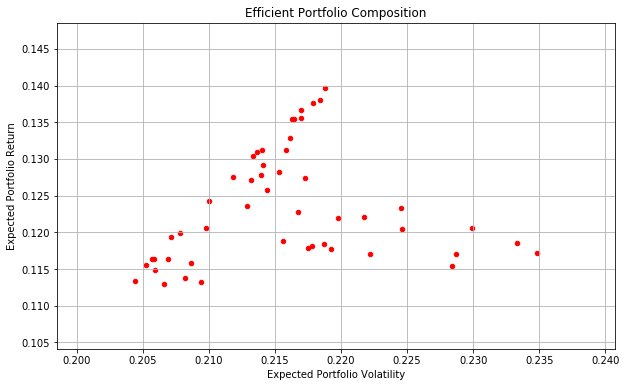

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


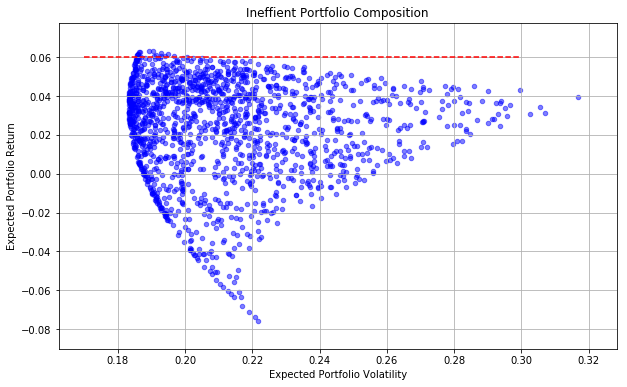

In [22]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

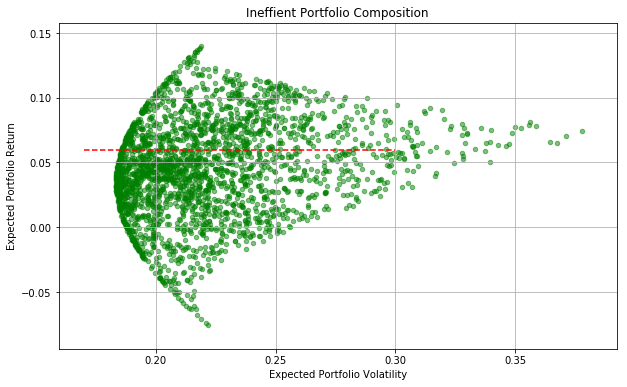

In [23]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)